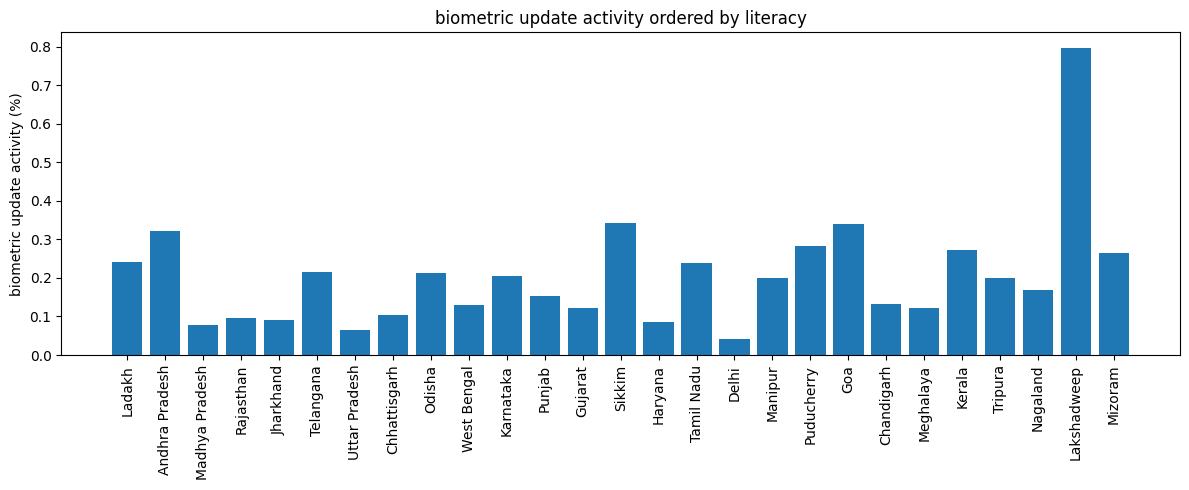

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bio_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
bio=bio_df.groupby("state").size().reset_index(name="biometric_updates")

population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={"State/UT":"state","Population 2025":"population"})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)

df=bio.merge(population,on="state")
df["biometric_update_percent"]=(df["biometric_updates"]/df["population"])*100

literacy=pd.read_excel("../sql/data/Aadhar_literacy.xlsx")
literacy.columns=literacy.columns.str.lower().str.strip()
lit_col=[c for c in literacy.columns if "literacy" in c][0]
literacy=literacy.rename(columns={literacy.columns[0]:"state",lit_col:"literacy_rate"})
literacy["literacy_rate"]=pd.to_numeric(literacy["literacy_rate"].astype(str).str.replace("%",""),errors="coerce")

df=df.merge(literacy,on="state").dropna()
df=df.sort_values("literacy_rate")

plt.figure(figsize=(12,5))
plt.bar(df["state"],df["biometric_update_percent"])
plt.xticks(rotation=90)
plt.ylabel("biometric update activity (%)")
plt.title("biometric update activity ordered by literacy")
plt.tight_layout()
plt.show()
